## Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

### Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первых ячейках ноутбука.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline
sns.set(style="ticks")

### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [2]:
#считаем файл целиком
original_data = pd.read_csv('credit_train_preprocess.csv', sep=",")

In [3]:
# Удалим дубликаты записей, если они присутствуют
data = original_data.drop_duplicates()


## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### Основные характеристики датасетов

In [4]:
# Первые 5 строк датасета
data.head()

,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg,gender_F,...,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID
0,34.0,59998.00,10,1.6,0.461599,30000.0,1.0,1.0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,34.0,10889.00,6,1.1,0.461599,35000.0,2.0,0.0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,32.0,10728.00,12,1.1,0.461599,35000.0,5.0,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,27.0,12009.09,12,1.1,0.461599,35000.0,2.0,0.0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,45.0,21229.00,10,1.1,0.421385,35000.0,1.0,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [5]:
# Размер датасета - 53732 строки, 9 колонок
data.shape

(169590, 39)

In [6]:
# Список колонок
data.columns

Index(['age', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk',
       'monthly_income', 'credit_count', 'overdue_credit_count',
       'open_account_flg', 'gender_F', 'gender_M', 'job_position_ATP',
       'job_position_BIS', 'job_position_BIU', 'job_position_DIR',
       'job_position_HSK', 'job_position_INP', 'job_position_INV',
       'job_position_NOR', 'job_position_ONB', 'job_position_PNA',
       'job_position_PNI', 'job_position_PNS', 'job_position_PNV',
       'job_position_SPC', 'job_position_UMN', 'job_position_WOI',
       'job_position_WRK', 'job_position_WRP', 'education_ACD',
       'education_GRD', 'education_PGR', 'education_SCH', 'education_UGR',
       'marital_status_CIV', 'marital_status_DIV', 'marital_status_MAR',
       'marital_status_UNM', 'marital_status_WID'],
      dtype='object')

In [7]:
# Список колонок с типами данных
# убедимся что типы данных одинаковы в обучающей и тестовых выборках
data.dtypes

age                     float64
credit_sum              float64
credit_month              int64
tariff_id               float64
score_shk               float64
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
gender_F                  int64
gender_M                  int64
job_position_ATP          int64
job_position_BIS          int64
job_position_BIU          int64
job_position_DIR          int64
job_position_HSK          int64
job_position_INP          int64
job_position_INV          int64
job_position_NOR          int64
job_position_ONB          int64
job_position_PNA          int64
job_position_PNI          int64
job_position_PNS          int64
job_position_PNV          int64
job_position_SPC          int64
job_position_UMN          int64
job_position_WOI          int64
job_position_WRK          int64
job_position_WRP          int64
education_ACD             int64
education_GRD             int64
educatio

In [8]:
# Проверим наличие пустых значений
data.isnull().sum()

age                     0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
gender_F                0
gender_M                0
job_position_ATP        0
job_position_BIS        0
job_position_BIU        0
job_position_DIR        0
job_position_HSK        0
job_position_INP        0
job_position_INV        0
job_position_NOR        0
job_position_ONB        0
job_position_PNA        0
job_position_PNI        0
job_position_PNS        0
job_position_PNV        0
job_position_SPC        0
job_position_UMN        0
job_position_WOI        0
job_position_WRK        0
job_position_WRP        0
education_ACD           0
education_GRD           0
education_PGR           0
education_SCH           0
education_UGR           0
marital_status_CIV      0
marital_status_DIV      0
marital_status_MAR      0
marital_status_UNM      0
marital_stat

**Вывод. Представленный набор данных не содержит пропусков ни в обучающей, ни в тестовой выборках.**

### Построение графиков для понимания структуры данных

In [ ]:
sns.pairplot(data, hue="open_account_flg")

KeyboardInterrupt: 

In [10]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['open_account_flg'].unique()

array([0, 1])

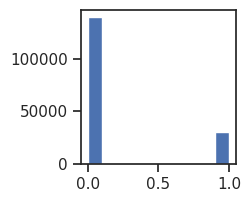

In [11]:
# Оценим дисбаланс классов для Occupancy
fig, ax = plt.subplots(figsize=(2,2))
plt.hist(data['open_account_flg'])
plt.show()

In [12]:
data['open_account_flg'].value_counts()

open_account_flg
0    139534
1     30056
Name: count, dtype: int64

In [13]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['open_account_flg'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 82.28%, а класс 1 составляет 17.72%.


**Вывод. Дисбаланс классов присутствует, но является приемлемым.**

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [14]:
data.dtypes

age                     float64
credit_sum              float64
credit_month              int64
tariff_id               float64
score_shk               float64
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
gender_F                  int64
gender_M                  int64
job_position_ATP          int64
job_position_BIS          int64
job_position_BIU          int64
job_position_DIR          int64
job_position_HSK          int64
job_position_INP          int64
job_position_INV          int64
job_position_NOR          int64
job_position_ONB          int64
job_position_PNA          int64
job_position_PNI          int64
job_position_PNS          int64
job_position_PNV          int64
job_position_SPC          int64
job_position_UMN          int64
job_position_WOI          int64
job_position_WRK          int64
job_position_WRP          int64
education_ACD             int64
education_GRD             int64
educatio

Для построения моделей будем использовать все признаки.


Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним масштабирование данных.

In [15]:
data.describe()

,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg,gender_F,...,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID
count,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,...,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000
mean,36.499811,26077.501535,10.984362,1.323852,0.469464,40125.364102,2.101568,0.043587,0.177227,0.519459,...,0.000631,0.424813,0.003308,0.512937,0.058311,0.024571,0.099263,0.550209,0.305602,0.020355
std,10.551456,16227.148256,3.543021,0.235861,0.124254,25026.244894,1.727873,0.205959,0.381862,0.499623,...,0.025111,0.494316,0.057420,0.499834,0.234332,0.154814,0.299016,0.497474,0.460663,0.141212
min,18.000000,2736.000000,3.000000,1.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,14907.950000,10.000000,1.100000,0.379549,25000.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,21220.000000,10.000000,1.320000,0.461599,35000.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,43.000000,32022.000000,12.000000,1.600000,0.552335,50000.000000,3.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,71.000000,200000.000000,36.000000,1.960000,1.128291,950000.000000,21.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
scaler = MinMaxScaler()
# Масштабирование колонок
data2 = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Проверка описательной статистики
print(data2.describe())

data2.describe()

                 age     credit_sum   credit_month      tariff_id  \
count  169590.000000  169590.000000  169590.000000  169590.000000   
mean        0.349053       0.118326       0.241950       0.337346   
std         0.199084       0.082261       0.107364       0.245689   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.188679       0.061704       0.212121       0.104167   
50%         0.301887       0.093702       0.212121       0.333333   
75%         0.471698       0.148461       0.272727       0.625000   
max         1.000000       1.000000       1.000000       1.000000   

           score_shk  monthly_income   credit_count  overdue_credit_count  \
count  169590.000000   169590.000000  169590.000000         169590.000000   
mean        0.416084        0.037170       0.100075              0.014529   
std         0.110126        0.026483       0.082280              0.068653   
min         0.000000        0.000000       0.000000              0.000

,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg,gender_F,...,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID
count,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,...,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000,169590.000000
mean,0.349053,0.118326,0.241950,0.337346,0.416084,0.037170,0.100075,0.014529,0.177227,0.519459,...,0.000631,0.424813,0.003308,0.512937,0.058311,0.024571,0.099263,0.550209,0.305602,0.020355
std,0.199084,0.082261,0.107364,0.245689,0.110126,0.026483,0.082280,0.068653,0.381862,0.499623,...,0.025111,0.494316,0.057420,0.499834,0.234332,0.154814,0.299016,0.497474,0.460663,0.141212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188679,0.061704,0.212121,0.104167,0.336393,0.021164,0.047619,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.301887,0.093702,0.212121,0.333333,0.409113,0.031746,0.095238,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.471698,0.148461,0.272727,0.625000,0.489532,0.047619,0.142857,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


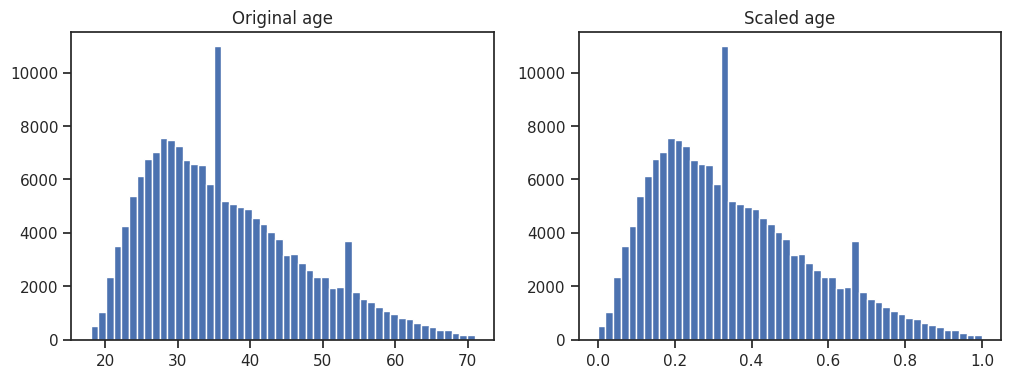

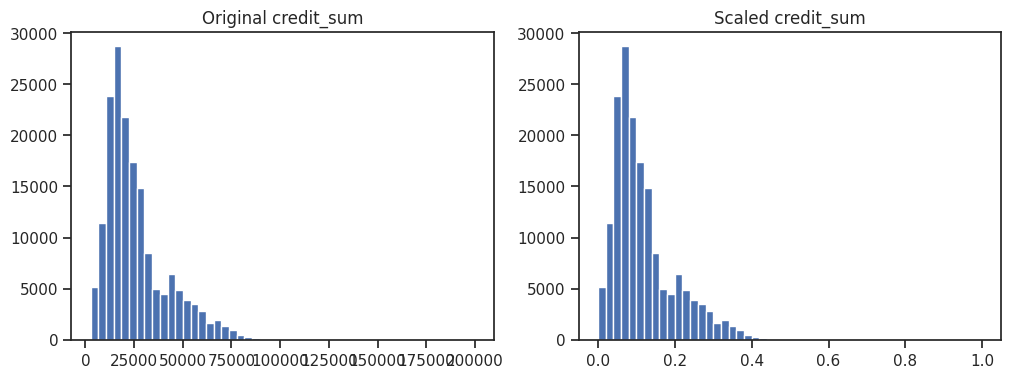

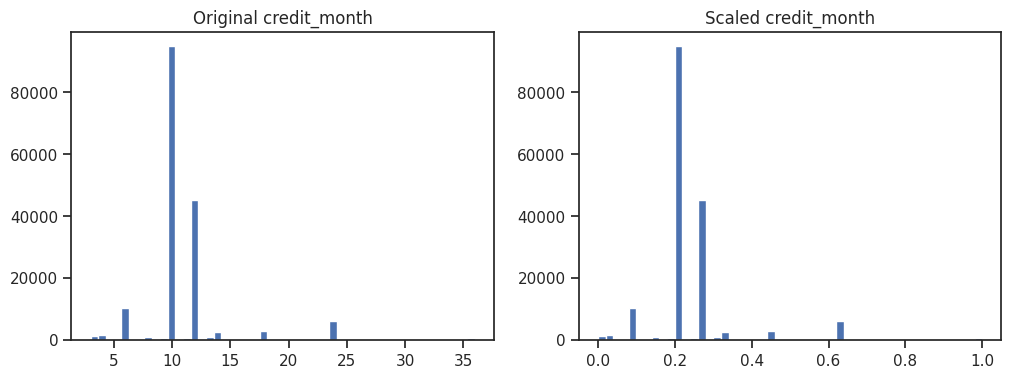

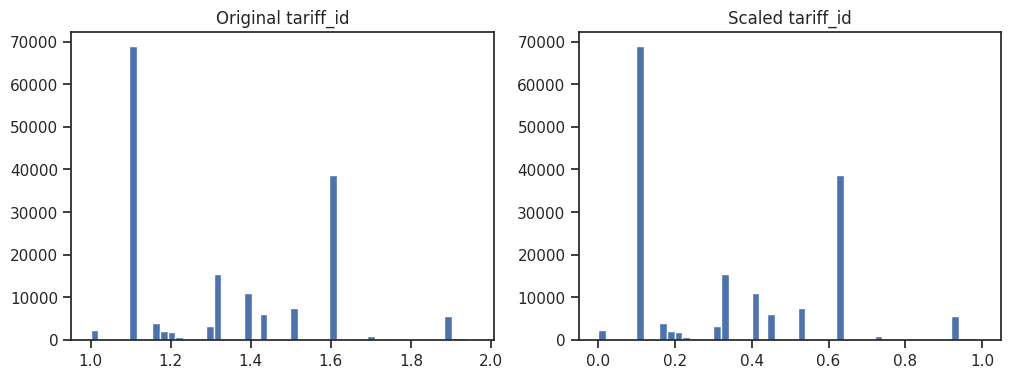

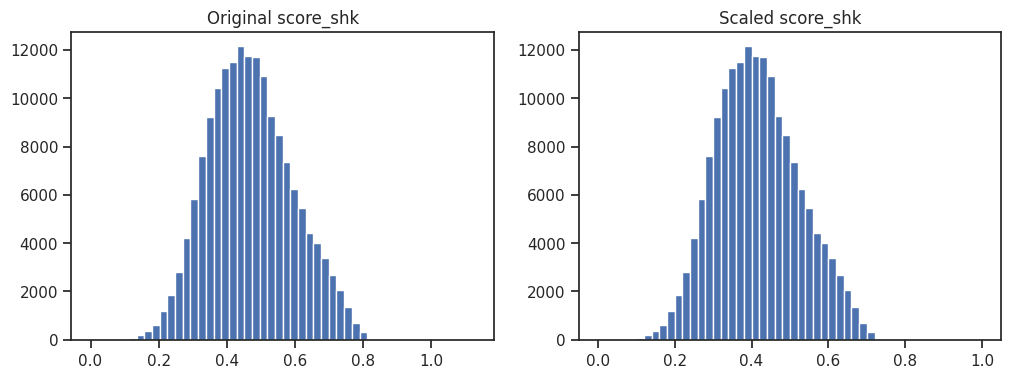

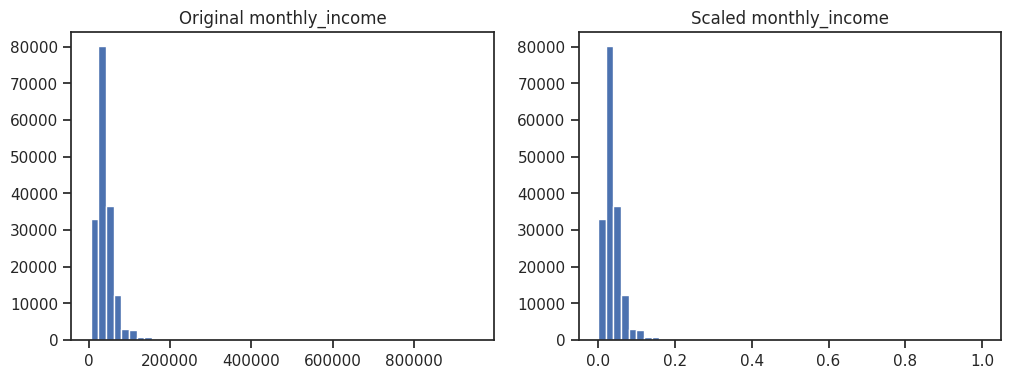

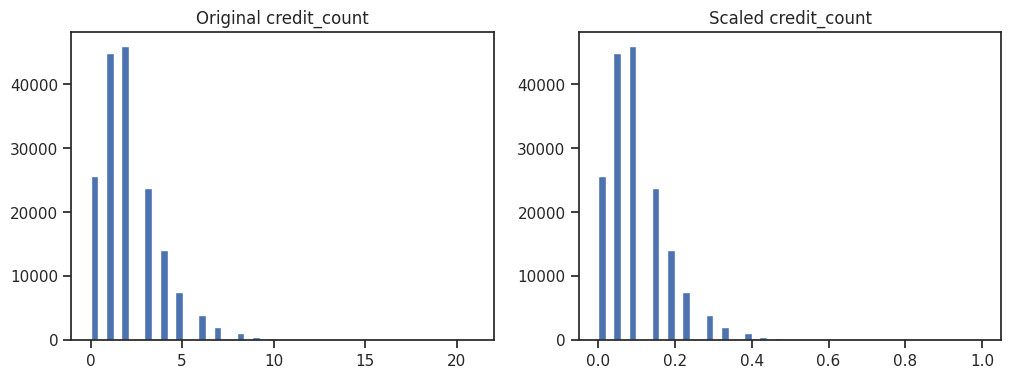

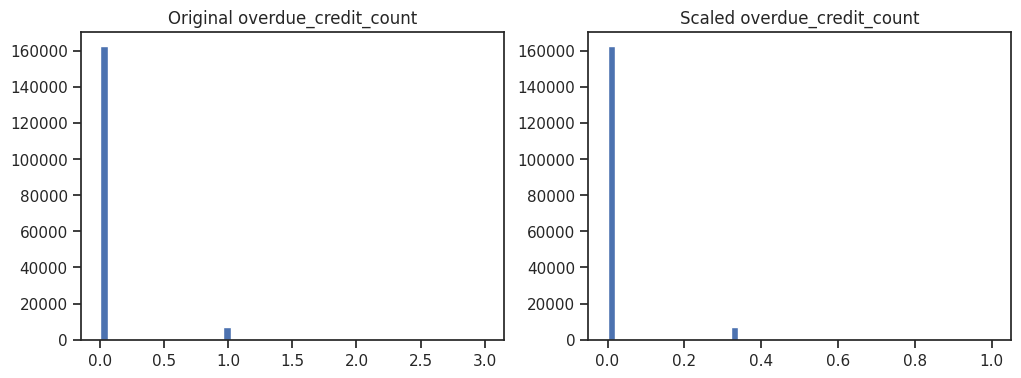

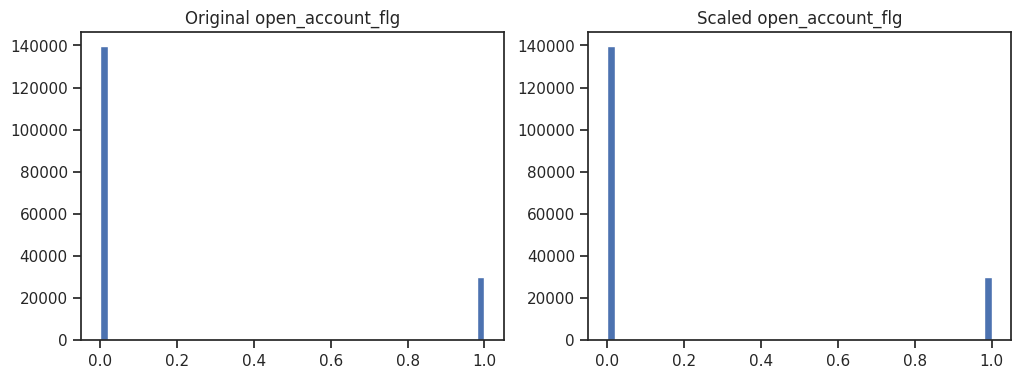

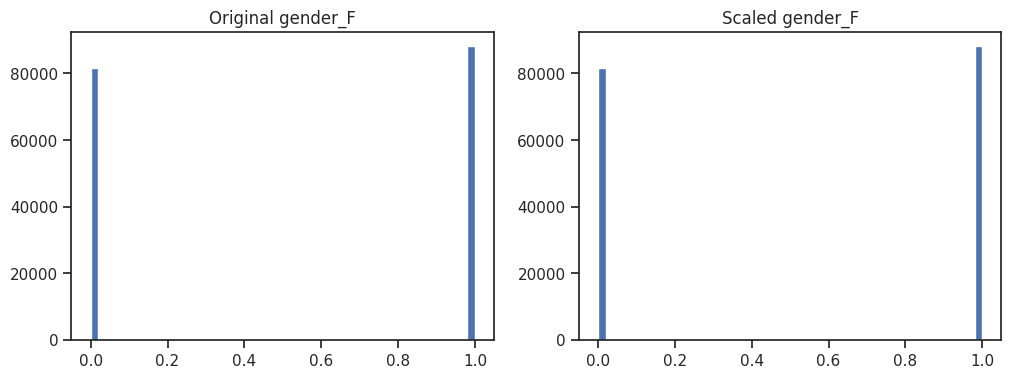

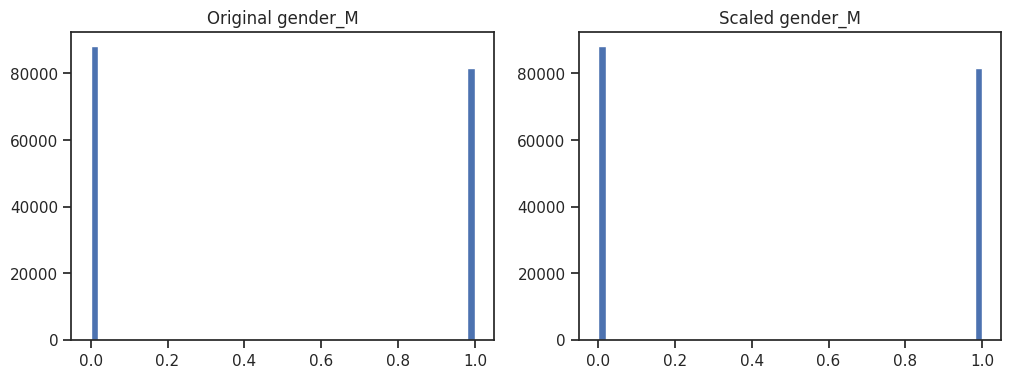

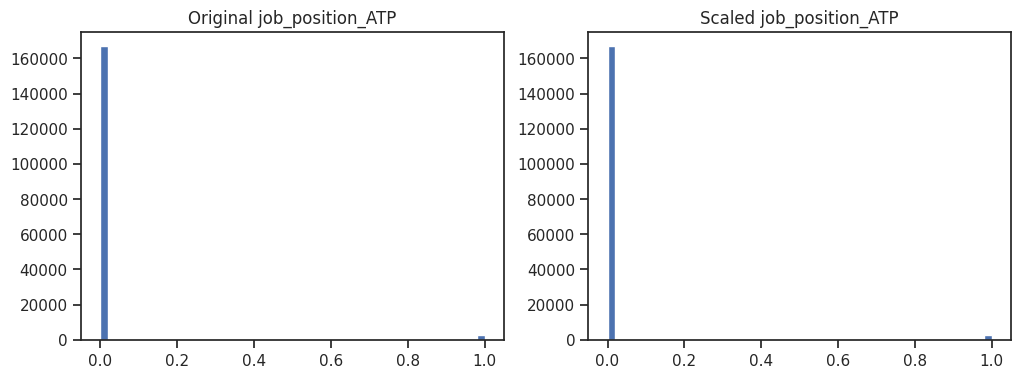

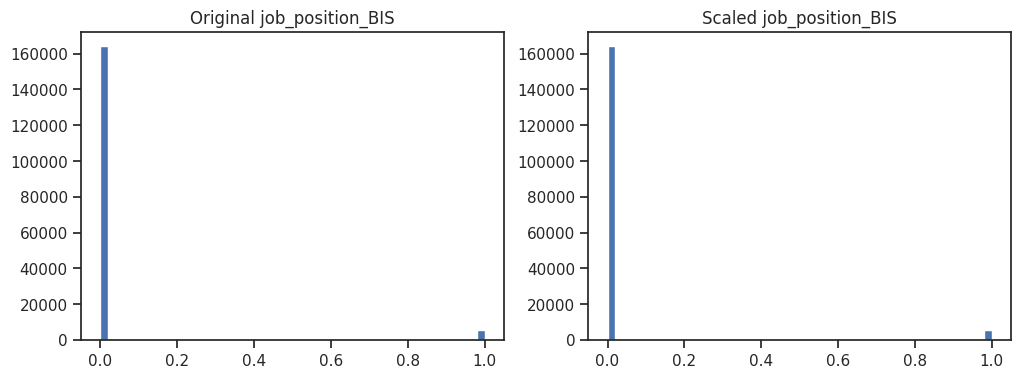

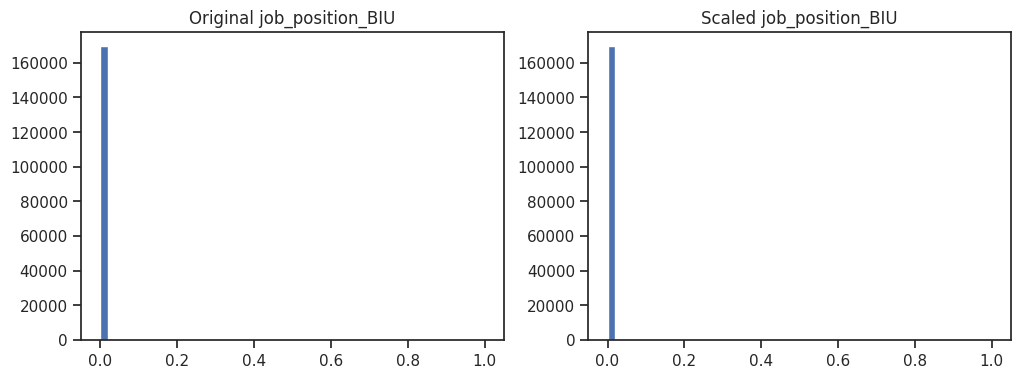

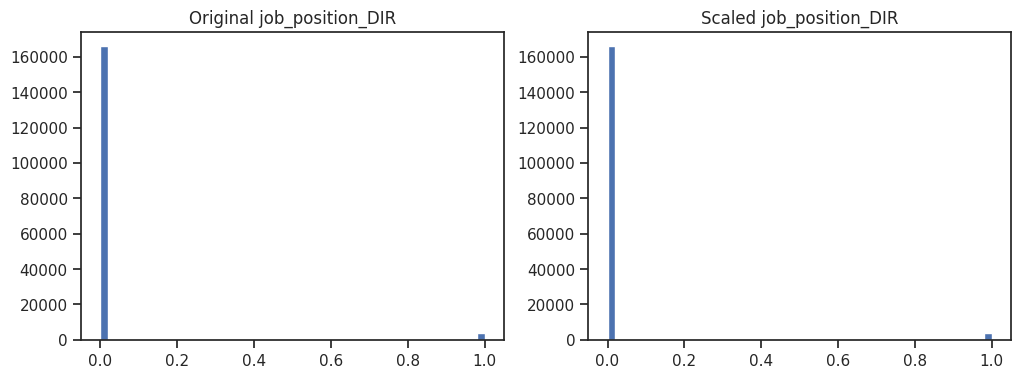

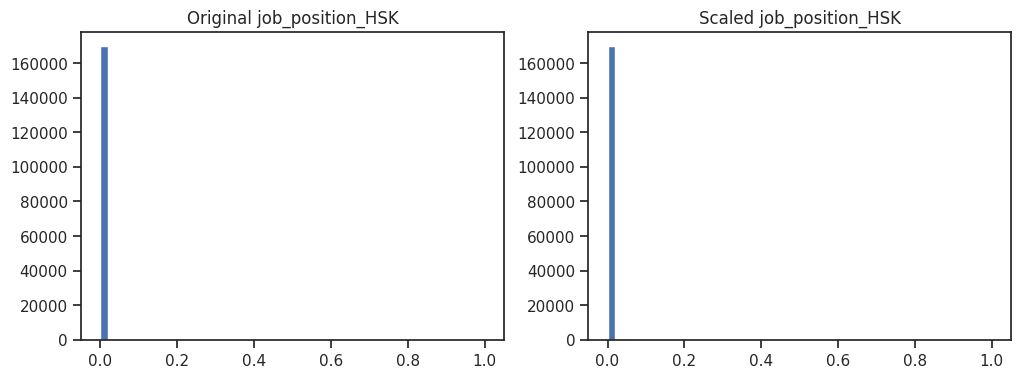

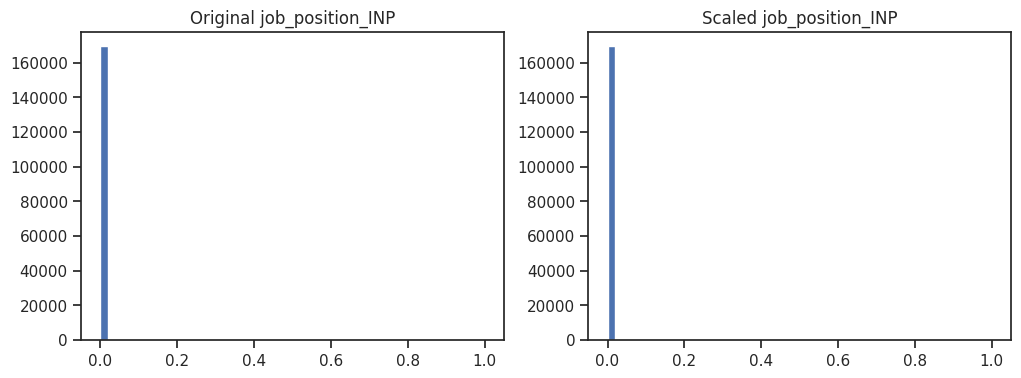

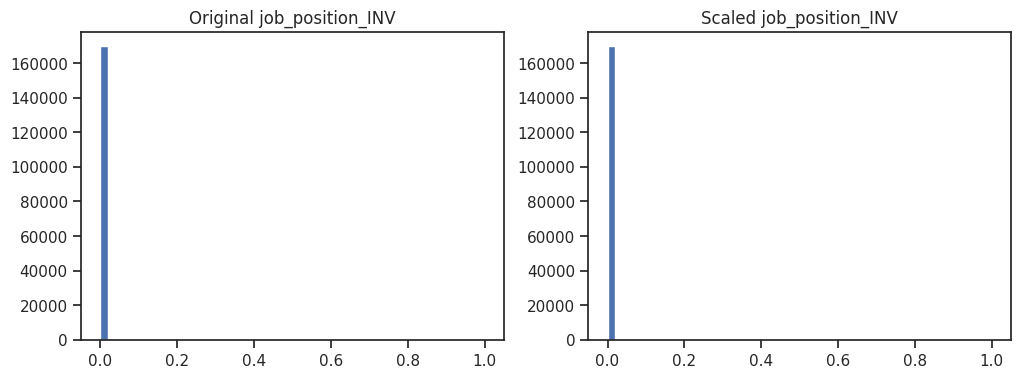

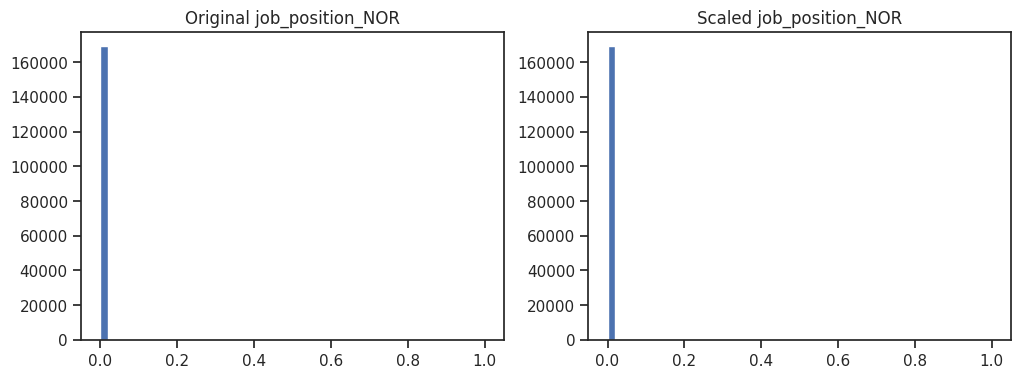

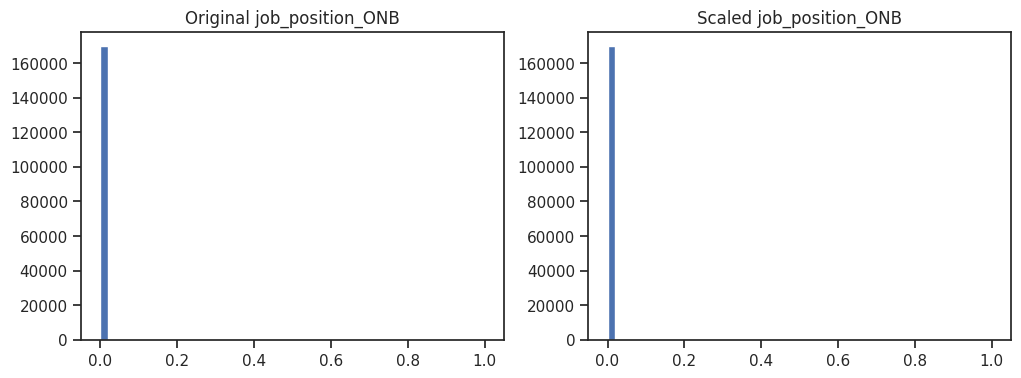

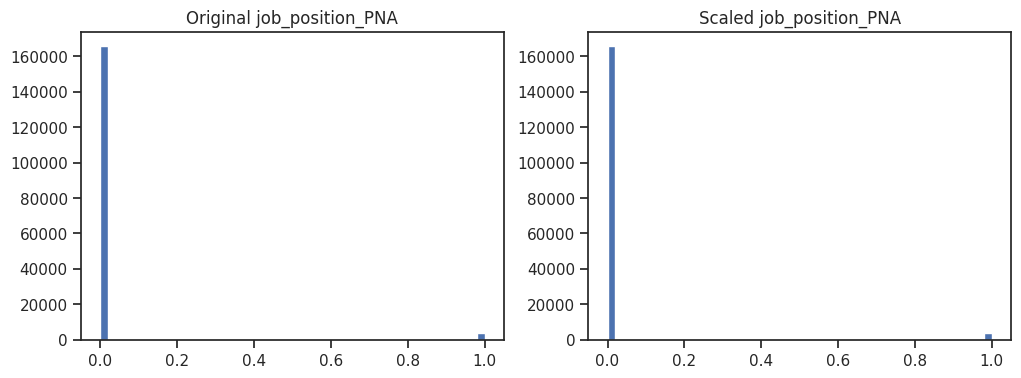

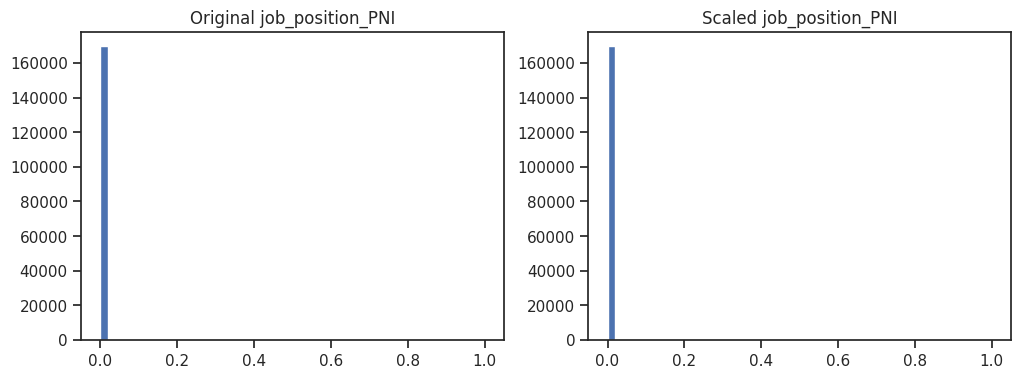

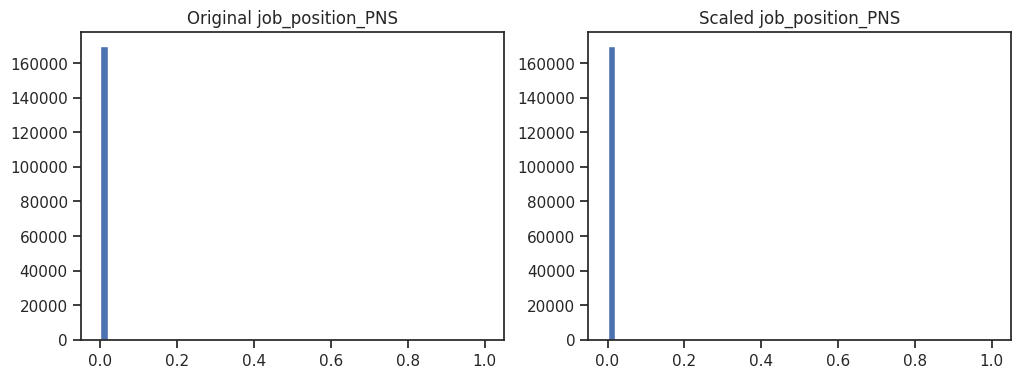

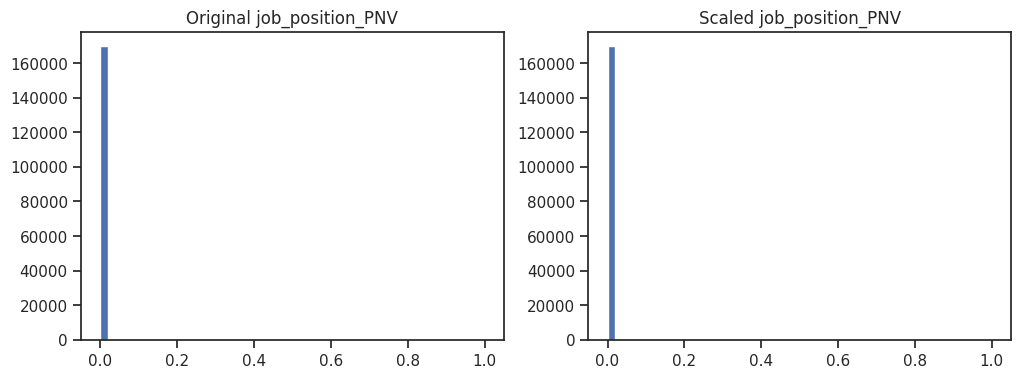

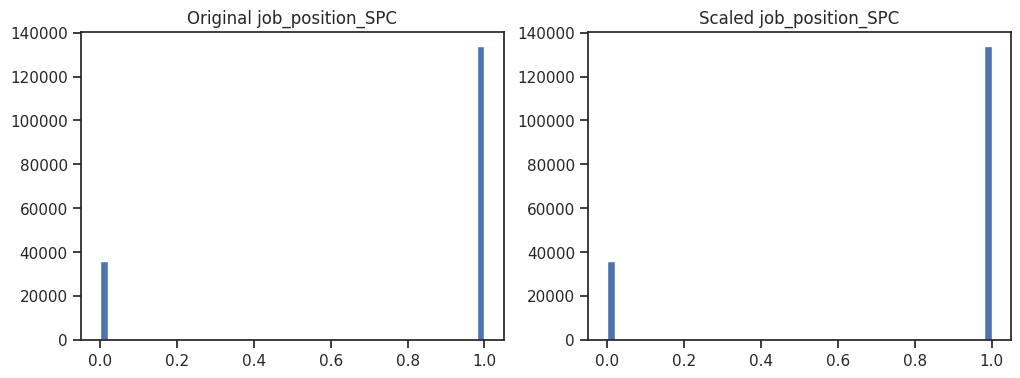

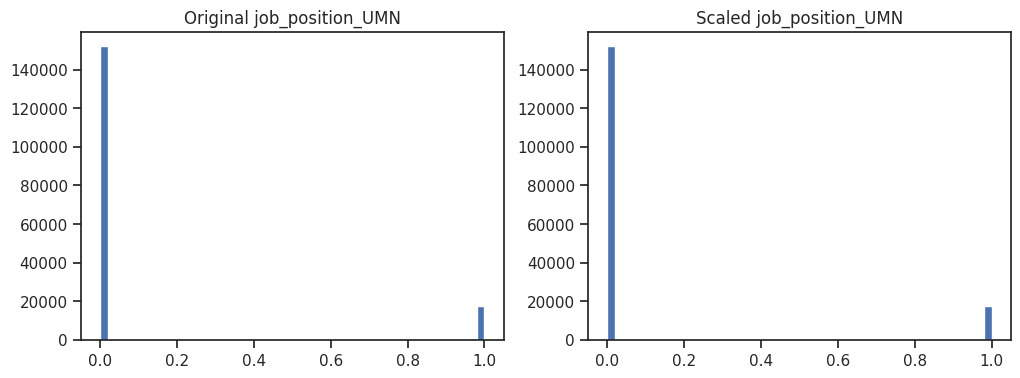

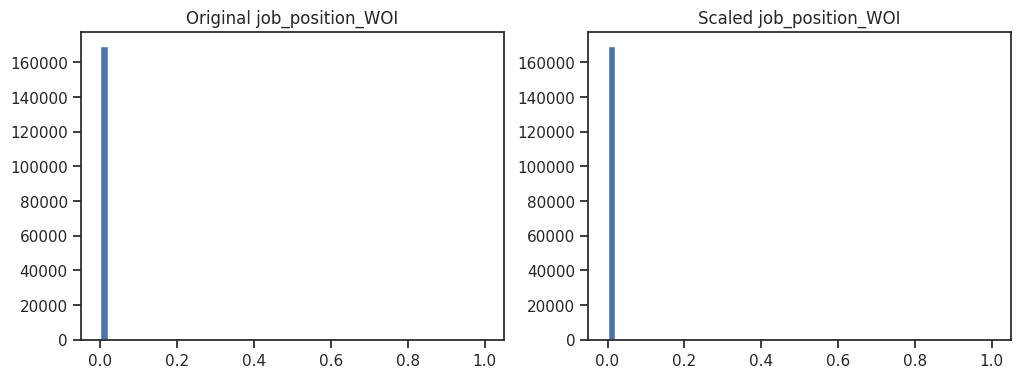

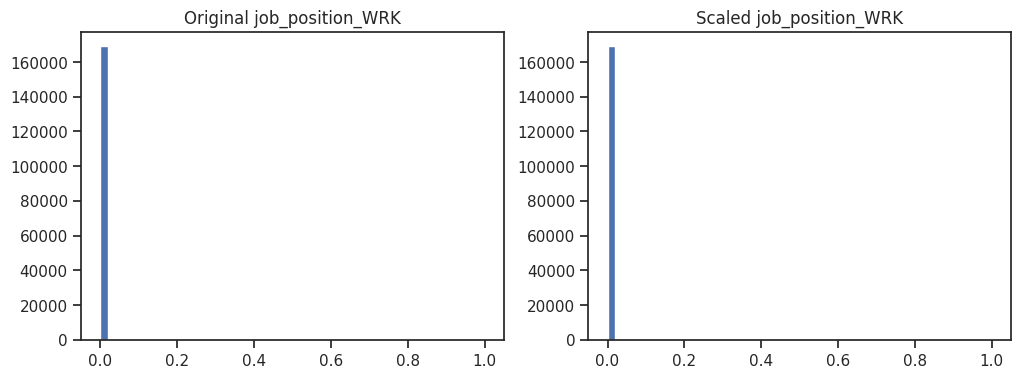

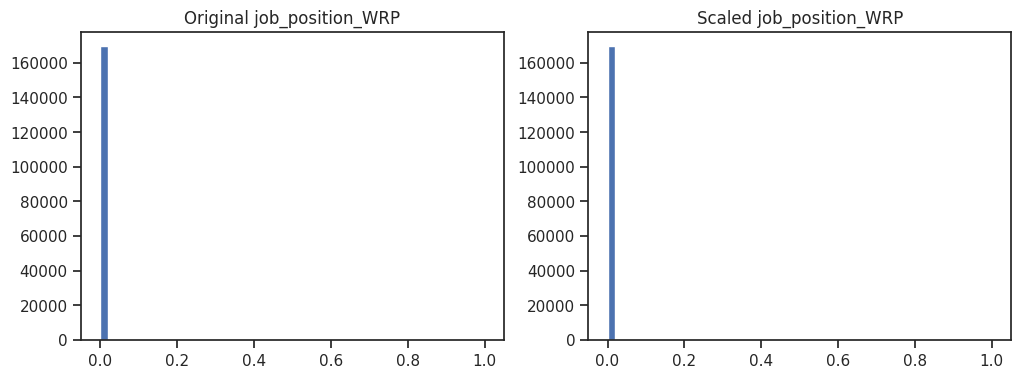

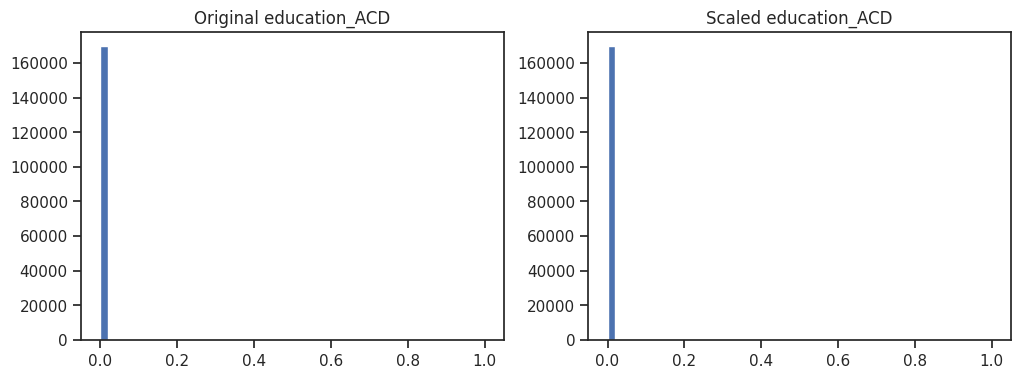

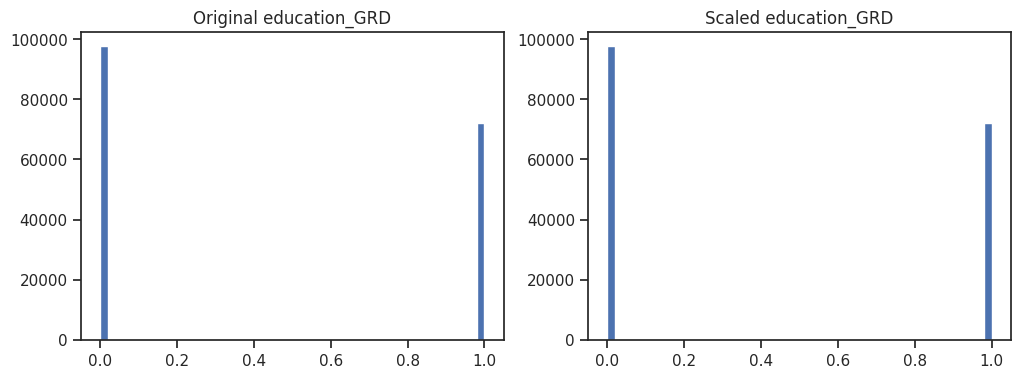

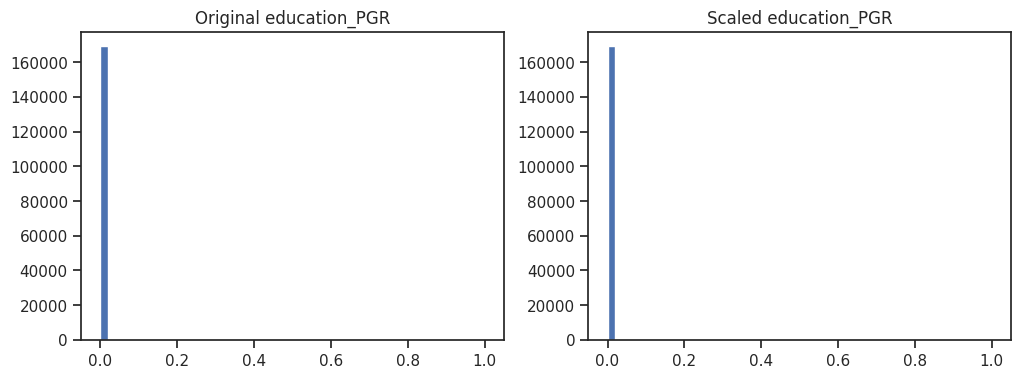

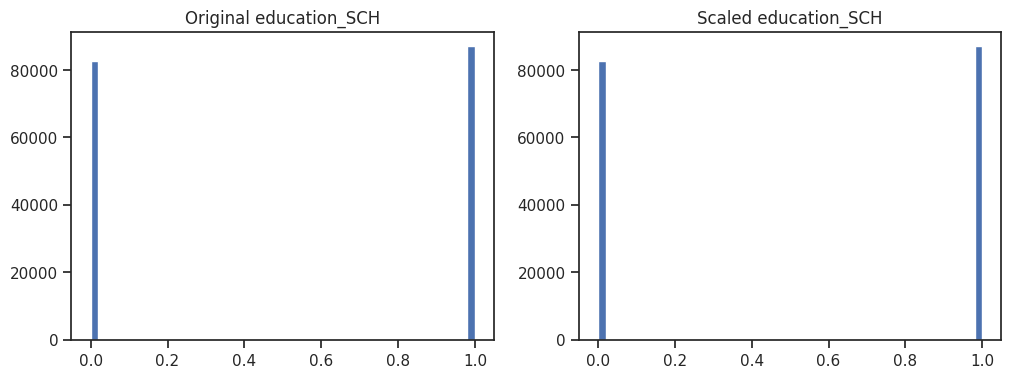

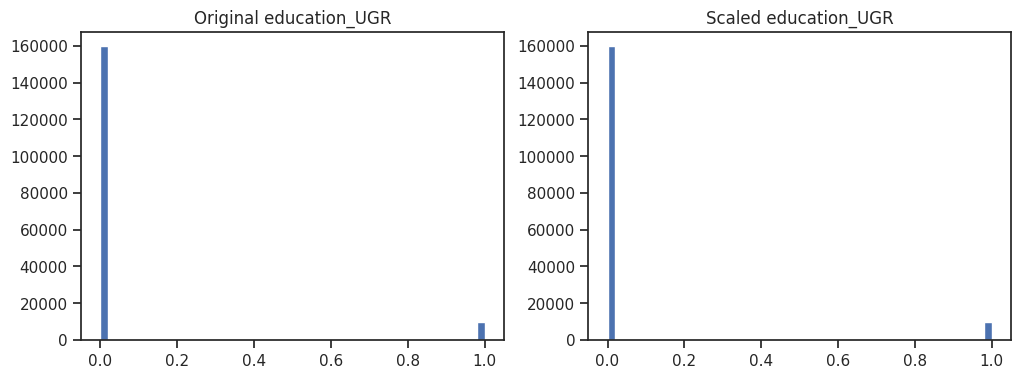

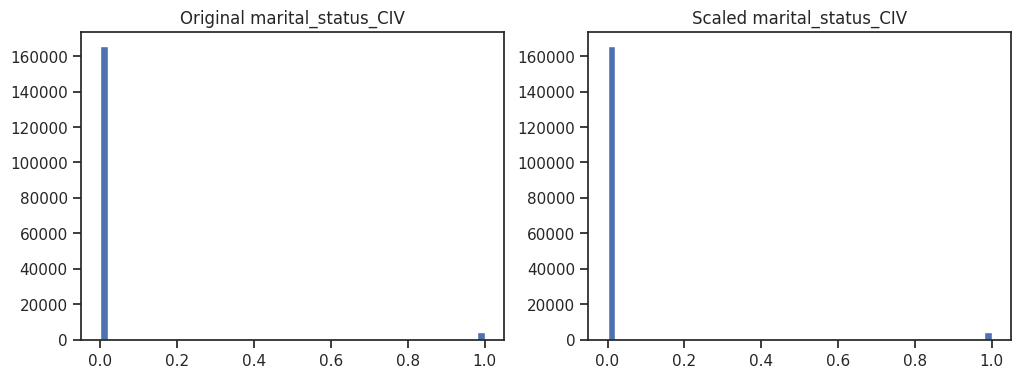

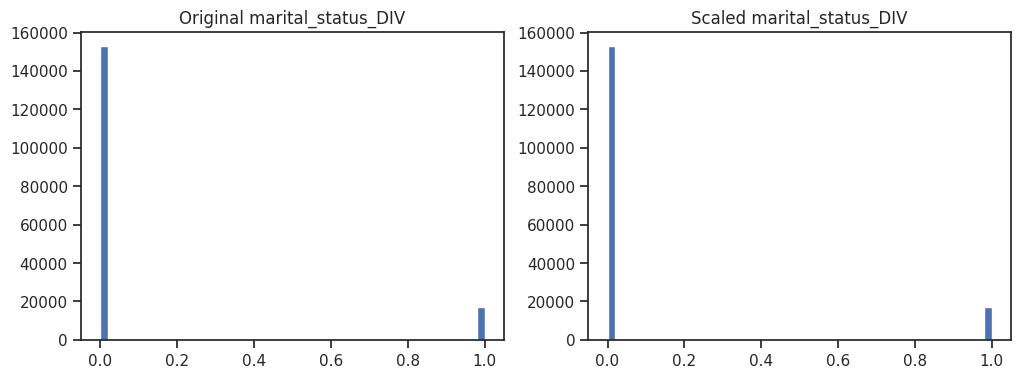

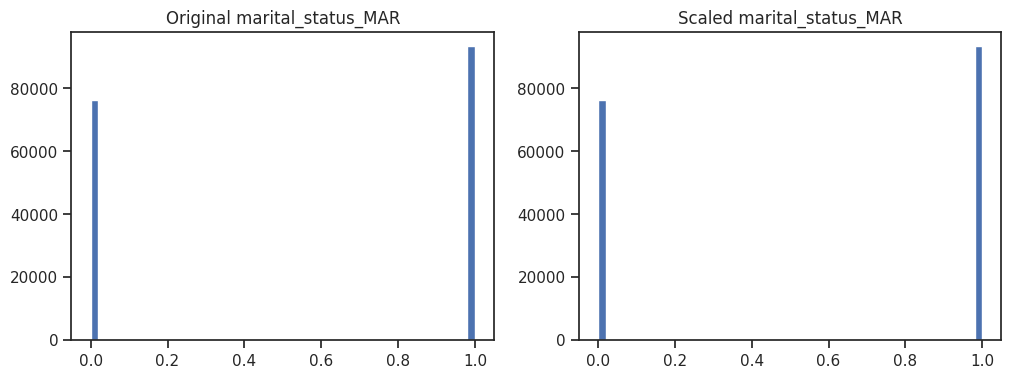

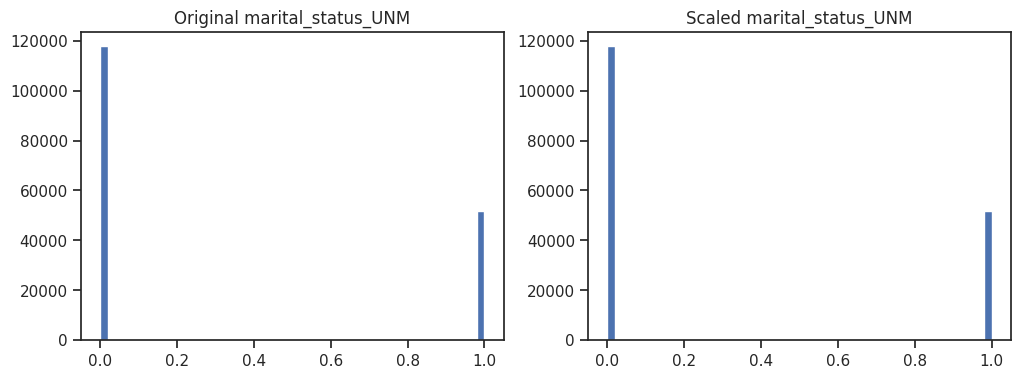

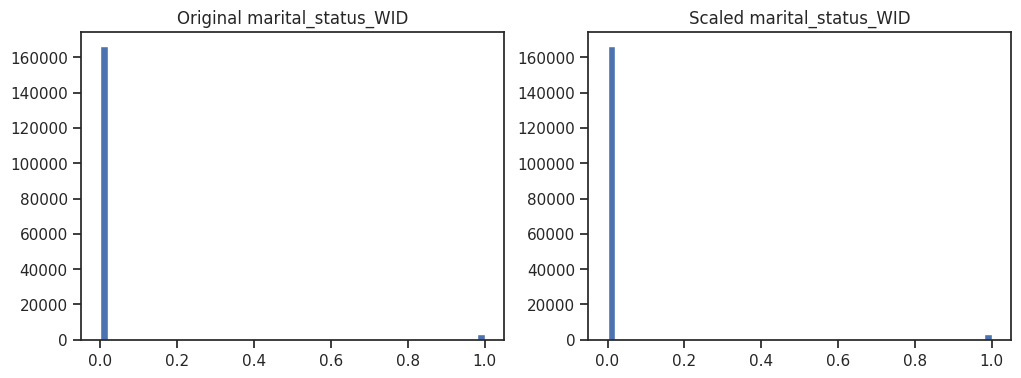

In [18]:
for col in data.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].hist(data[col], 50)
    ax[1].hist(data2[col], 50)
    ax[0].title.set_text(f'Original {col}')
    ax[1].title.set_text(f'Scaled {col}')
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

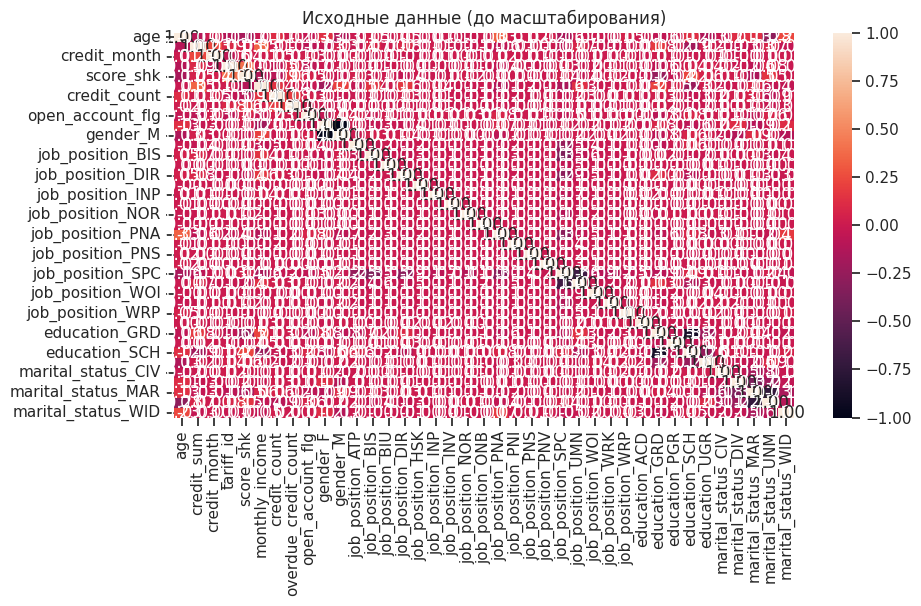

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

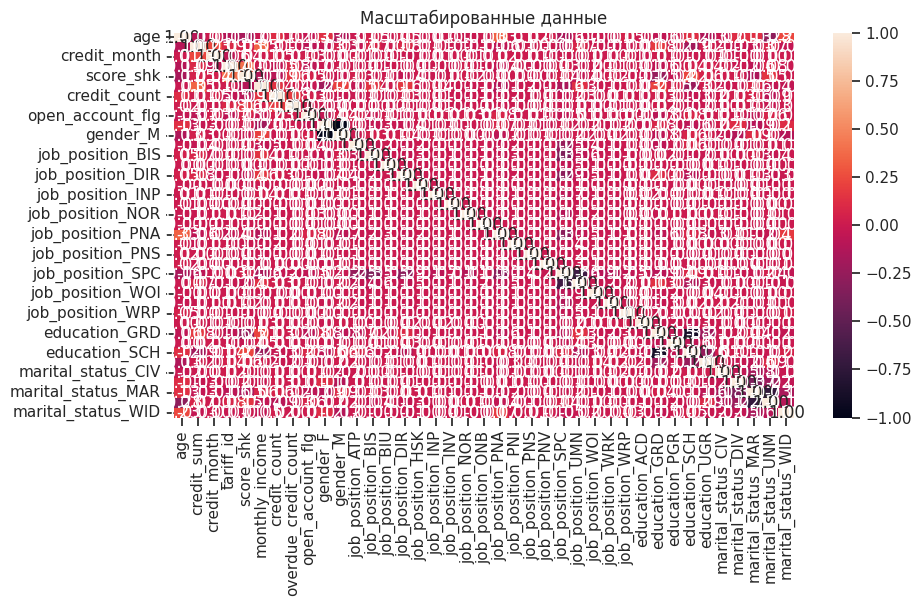

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data2.corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

## Выбор метрик для последующей оценки качества моделей.

### В качестве метрик для решения задачи классификации  будем использовать:

Метрики, формируемые на основе матрицы ошибок:

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

#### Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [21]:
class MetricLogger:
    def __init__(self):
        self.df = pd.DataFrame({
            'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')
        })

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric'] == metric) & (self.df['alg'] == alg)].index, inplace=True)
        # Добавление нового значения
        temp = pd.DataFrame([{'metric': metric, 'alg': alg, 'value': value}])
        self.df = pd.concat([self.df, temp], ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric'] == metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values

    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5,
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a, b in zip(pos, array_metric):
            plt.text(0.5, a - 0.05, str(round(b, 3)), color='white')
        plt.show()

## Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг


## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [25]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data.drop('open_account_flg', axis=1), data['open_account_flg'], test_size=0.5,random_state=42)

In [26]:
data_X_train.shape, data_X_test.shape, data_y_train.shape, data_y_test.shape

((84795, 38), (84795, 38), (84795,), (84795,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

### Решение задачи классификации

In [27]:
# Модели
clas_models = {'LogR': LogisticRegression(),
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [28]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [29]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [30]:
def clas_train_model(model_name, model, dataMetricLogger):
    model.fit(data_X_train, data_y_train)
    # Предсказание значений
    Y_pred = model.predict(data_X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(data_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]

    precision = precision_score(data_y_test.values, Y_pred)
    recall = recall_score(data_y_test.values, Y_pred)
    f1 = f1_score(data_y_test.values, Y_pred)
    roc_auc = roc_auc_score(data_y_test.values, Y_pred_proba)

    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    draw_roc_curve(data_y_test, Y_pred_proba, ax[0])
    ConfusionMatrixDisplay.from_estimator(model, data_X_test, data_y_test, ax=ax[1],
                                          display_labels=['0', '1'],
                                          cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


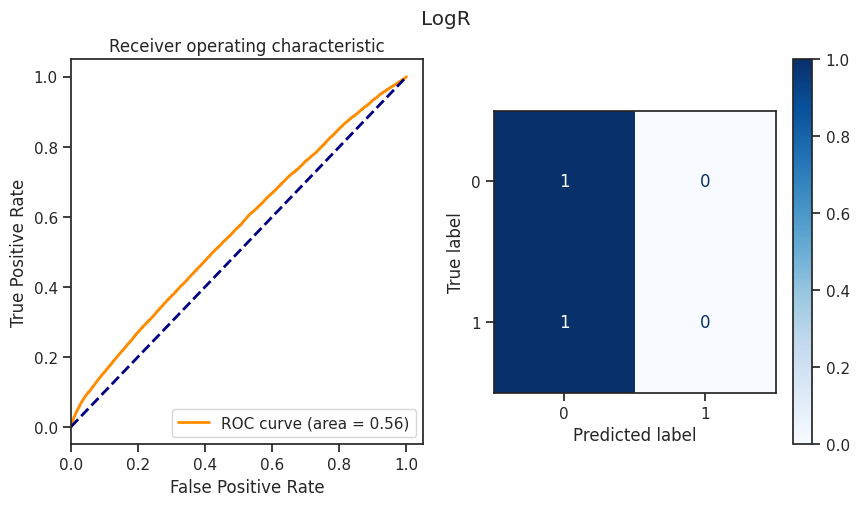

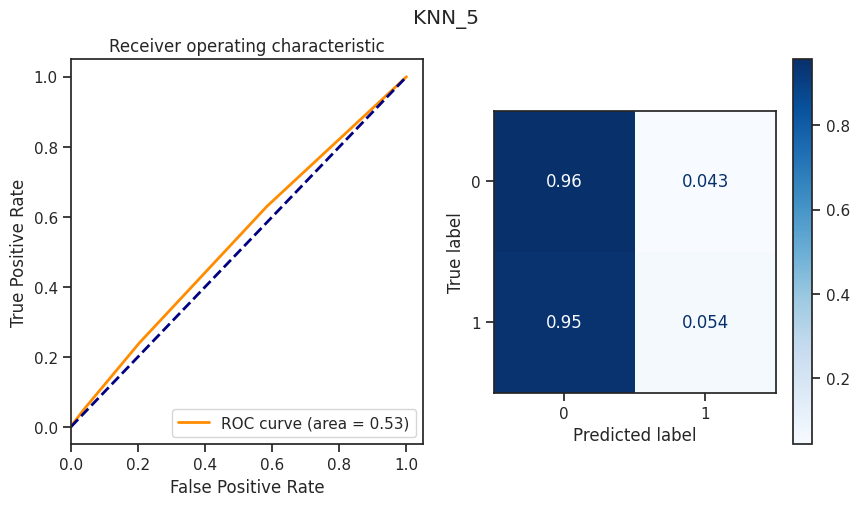

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


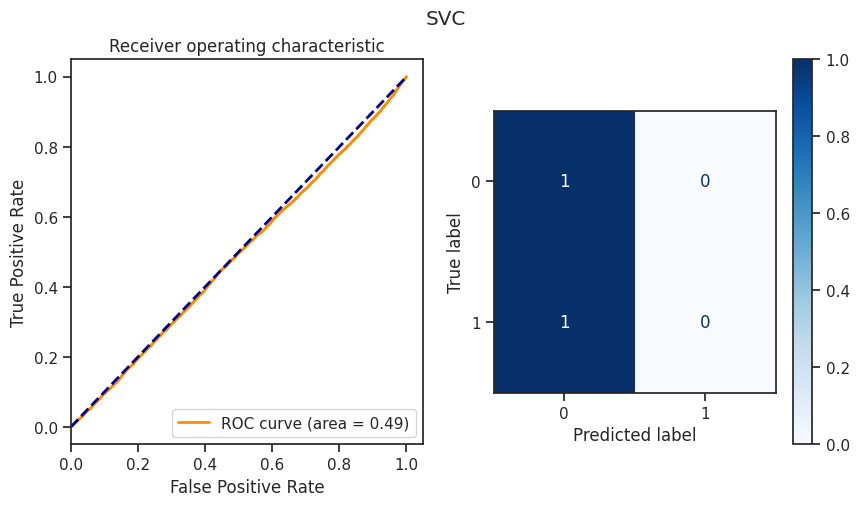

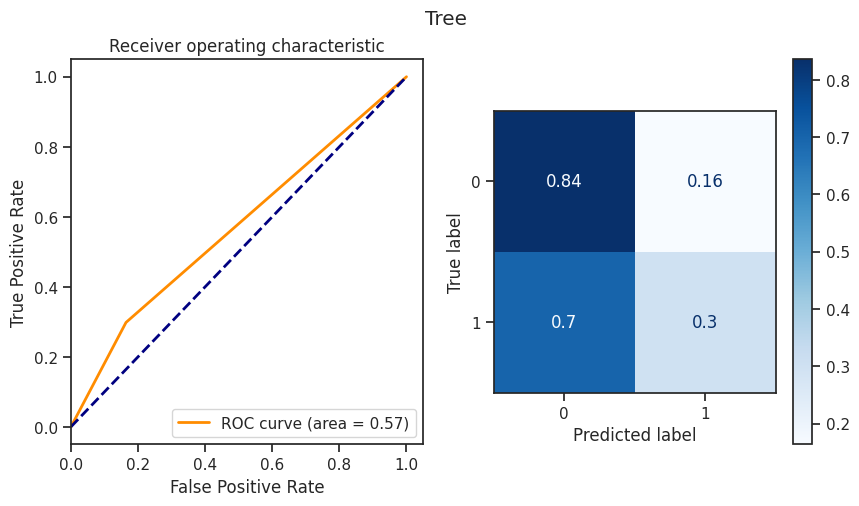

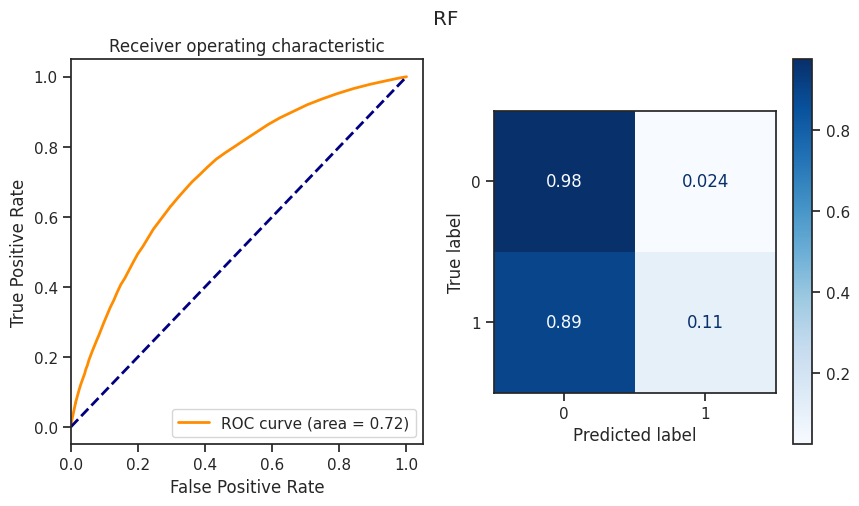

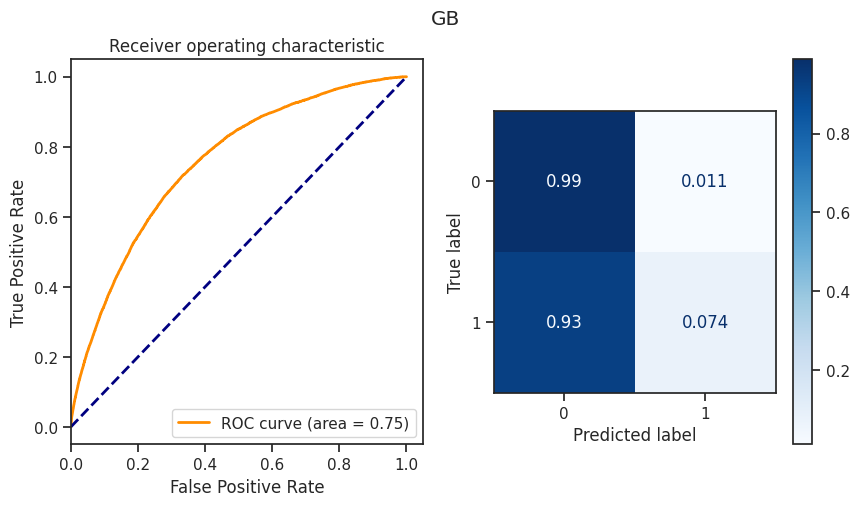

In [31]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

### Пример для задачи классификации

In [32]:
data_X_train.shape

(84795, 38)

In [33]:
n_range_list = list(range(0,1250,50))
n_range_list[0] = 1

In [34]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
          550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
         1100, 1150, 1200])}]

In [35]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(data_X_train, data_y_train)

CPU times: user 46min 11s, sys: 16.2 s, total: 46min 27s
Wall time: 29min 3s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200])}],
             scoring='roc_auc')

In [36]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=1200)

In [37]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 1200}

In [38]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'1200'

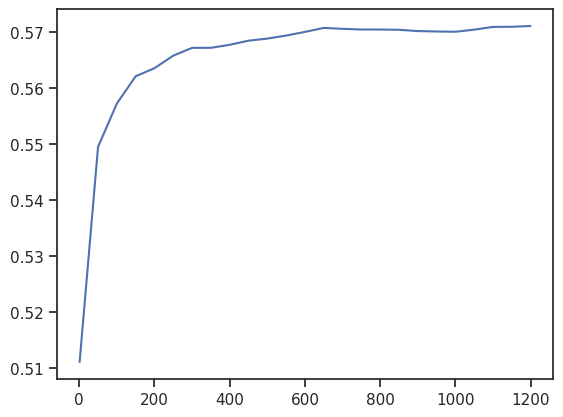

In [39]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### Решение задачи классификации

In [40]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5),
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

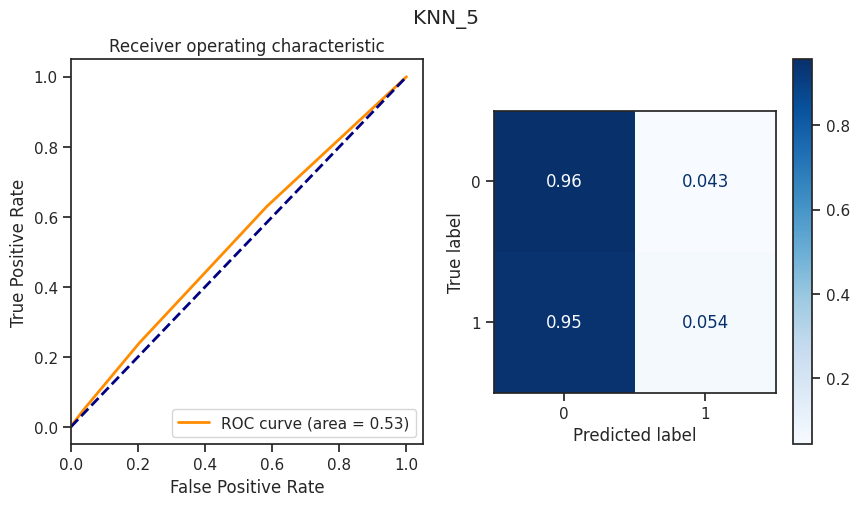

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


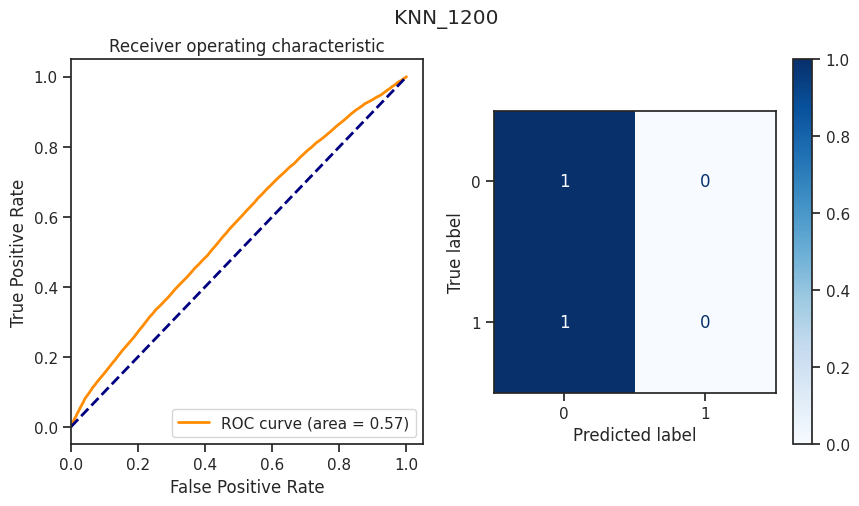

In [41]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

### Решение задачи классификации

In [42]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

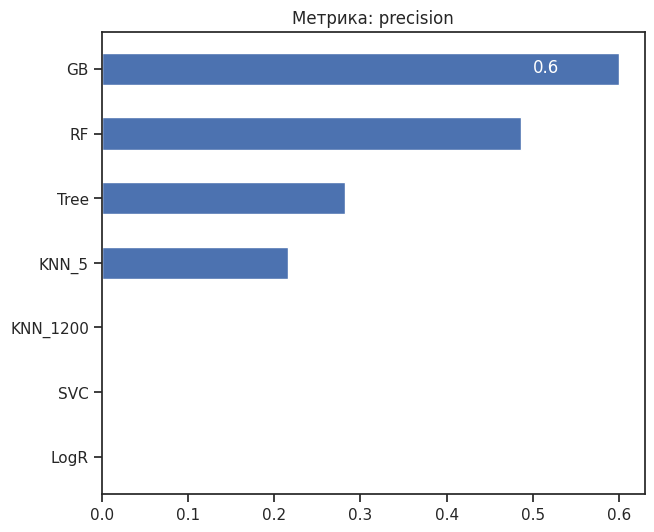

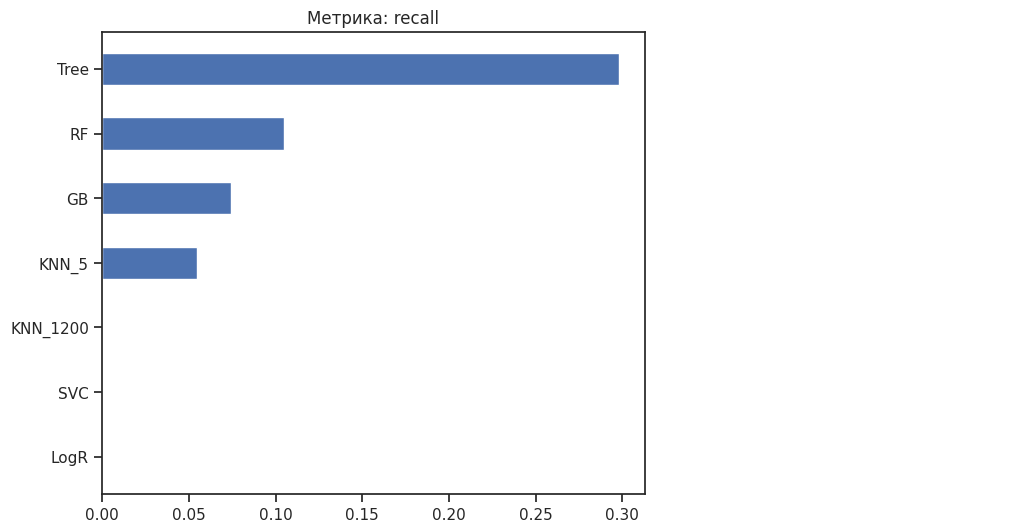

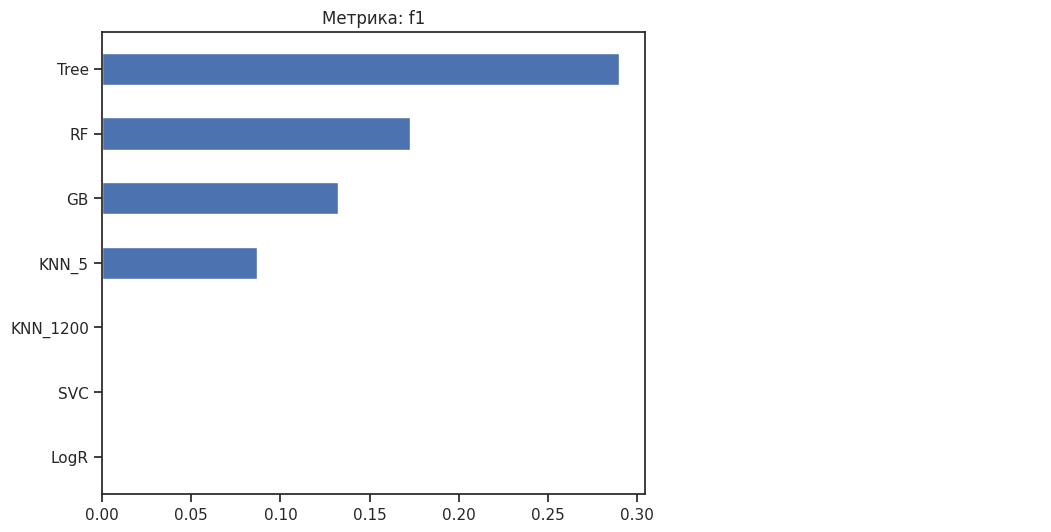

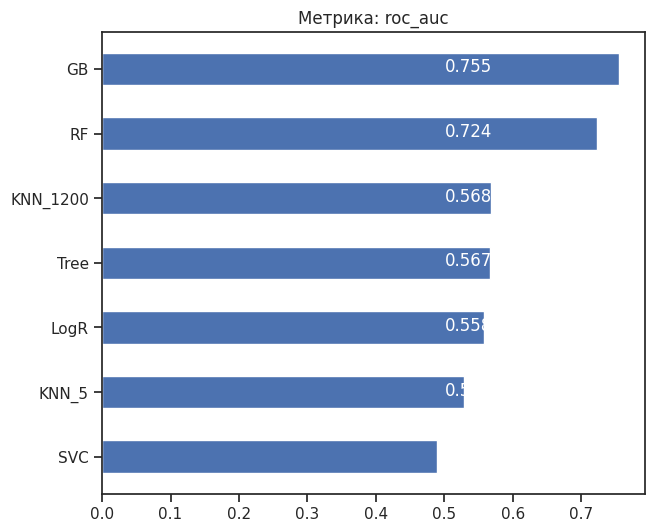

In [43]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))